In [9]:
import pandas as pd
import datetime as dt

# read data Active-Losses
df_losses = pd.read_csv('../../data/Avtice-losses.csv', header=1, parse_dates=['Zeitstempel'])

# shift Zeitstempel by 15min
df_losses['Zeitstempel'] = df_losses['Zeitstempel'] - dt.timedelta(minutes=15)

# calculate average for daylight saving time in Octobers
df_losses = df_losses.groupby(['Zeitstempel'], as_index=False)['kWh'].mean()

# resample PT15M to PT1H
df_losses_1H = df_losses.resample('H', on='Zeitstempel').sum().reset_index()

# convet kWh to MWh and rename column
df_losses_1H['kWh'] = df_losses_1H['kWh']/1000
df_losses_1H = df_losses_1H.rename(columns={'kWh':'MWh'})

df_losses_1H

,Zeitstempel,MWh
0,2019-01-01 00:00:00,139.525004
1,2019-01-01 01:00:00,129.716036
2,2019-01-01 02:00:00,133.398074
3,2019-01-01 03:00:00,135.133852
4,2019-01-01 04:00:00,131.699424
...,...,...
26299,2021-12-31 19:00:00,171.707318
26300,2021-12-31 20:00:00,159.462903
26301,2021-12-31 21:00:00,155.109520
26302,2021-12-31 22:00:00,171.370277


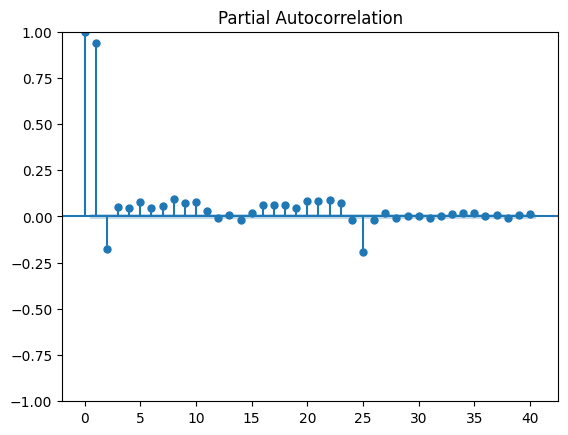

In [20]:
# Partial Autocorrection
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_pacf

# set Zeitstempel as index
df_losses = df_losses_1H.set_index('Zeitstempel')

# plot PACF
plot_pacf(df_losses, lags=40, method='ywm')
pyplot.show()